# Unwarp images

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"
%run -i "Line.py"

# Load Camera calibration params
[warped_images, M_values, Minv_values ] = pickle.load(open( "pickle_data/warped_images_params.p", "rb" ) )
[leftLines, rightLines  ] = pickle.load(open( "pickle_data/lines_lane.p", "rb" ) )
und_images = pickle.load(open( "pickle_data/undistorted_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20607 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

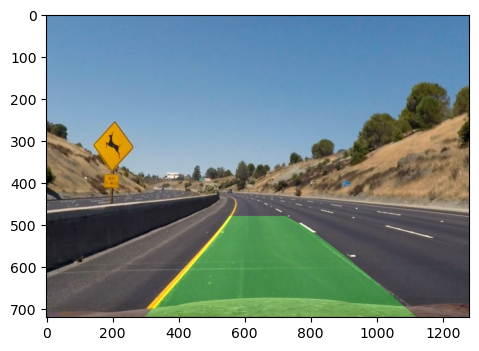

In [2]:
currentIndex = 3

warp_zero = np.zeros_like(warped_images[currentIndex]).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

pts_left = np.array([np.transpose(np.vstack([leftLines[currentIndex].poly_plotx, leftLines[currentIndex].poly_ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([rightLines[currentIndex].poly_plotx, rightLines[currentIndex].poly_ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

newwarp = cv2.warpPerspective(color_warp, M_values[currentIndex], (und_images[currentIndex].shape[1], und_images[0].shape[0])) 
result = cv2.addWeighted(und_images[currentIndex], 1, newwarp, 0.3, 0)


displayListImages([result],cols=2,cmap='gray',figSize=[12,2])

## Apply to all images

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

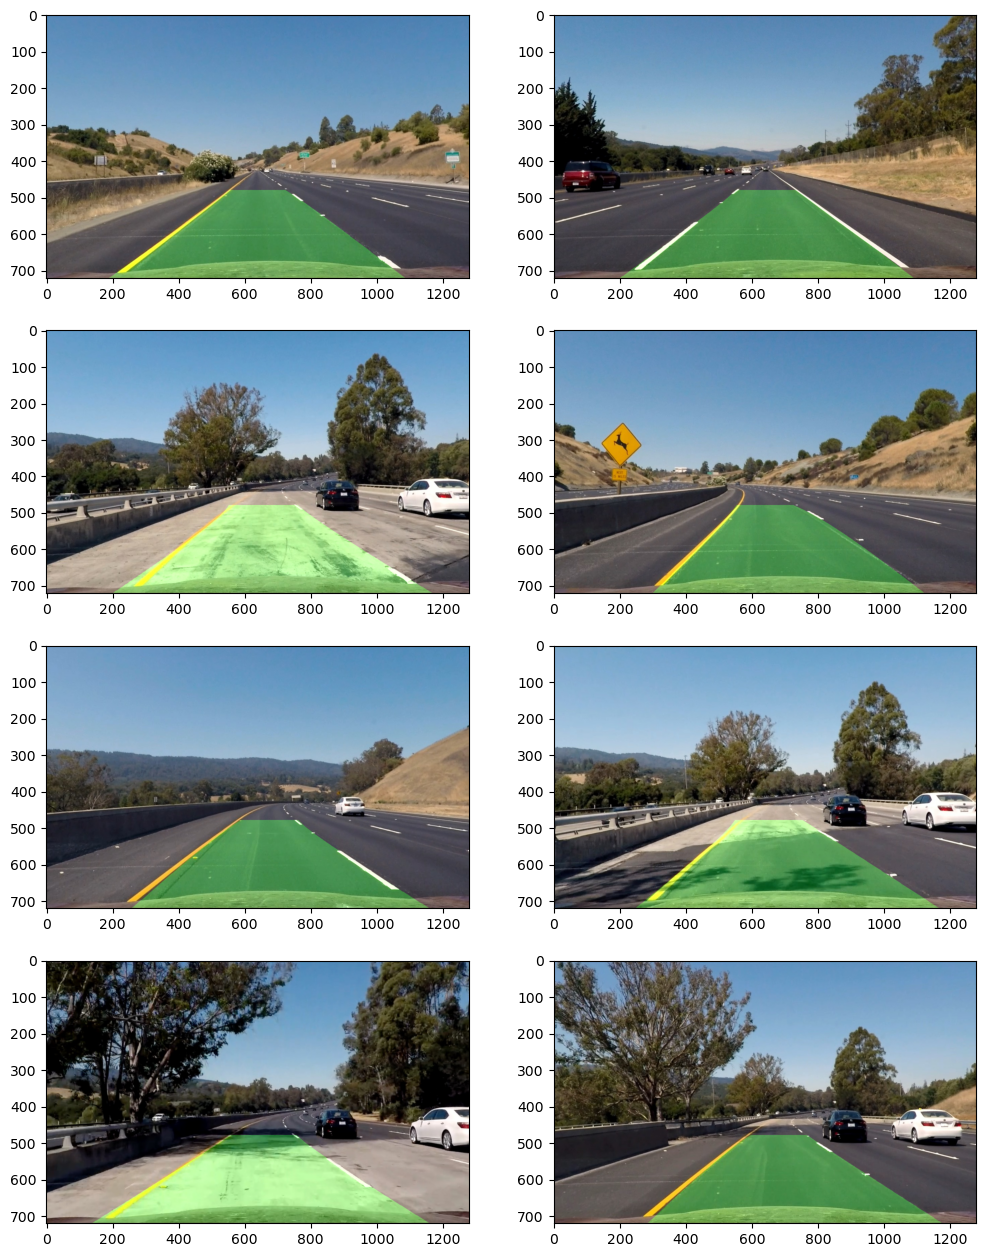

In [3]:
result_Images = []

for i in range(len(warped_images)):
    warp_zero = np.zeros_like(warped_images[i]).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    pts_left = np.array([np.transpose(np.vstack([leftLines[i].poly_plotx, leftLines[i].poly_ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([rightLines[i].poly_plotx, rightLines[i].poly_ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    newwarp = cv2.warpPerspective(color_warp, M_values[i], (und_images[i].shape[1], und_images[0].shape[0])) 
    result = cv2.addWeighted(und_images[i], 1, newwarp, 0.3, 0)
    
    result_Images.append(result)


displayListImages(result_Images,cols=2,figSize=[12,8])

In [4]:
pickle.dump( result_Images, open( "pickle_data/result_Images.p", "wb" ) )

***

## Images Report

In [5]:
# path = './output_images/'


# for i in range(len(result_Images)):
#     write_name = 'warped_lane_images_'+str(i)+'.jpg'
#     im_rgb = cv2.cvtColor(result_Images[i], cv2.COLOR_RGB2BGR)
#     cv2.imwrite(os.path.join(path , write_name), im_rgb)